# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, matplotlib.pyplot as plt
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [2]:
#On importe les données dans un dataframe
df = pd.read_excel("C:/Users/Sa_Osenat/OneDrive - gbh.fr/Bureau/Formation OC/historique_immobilier_paris_2017_2021_vdef2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
df.dtypes
print(df.head())
#Les types de données semblent cohérents

  date_mutation  valeur_fonciere  adresse_numero  \
0    2017-01-03     5.505597e+05               8   
1    2017-01-12     1.576492e+06              32   
2    2017-01-10     6.577574e+05              52   
3    2017-01-10     2.500868e+05              64   
4    2017-01-13     1.762667e+05              25   

                 adresse_nom_voie  code_postal               nom_commune  \
0  RUE DES COUTURES SAINT GERVAIS        75003   Paris 3e Arrondissement   
1                      AV MARCEAU        75008   Paris 8e Arrondissement   
2    RUE DU FAUBOURG SAINT HONORE        75008   Paris 8e Arrondissement   
3                 RUE DU VERTBOIS        75003   Paris 3e Arrondissement   
4  RUE DES LAVANDIERES STE OPPORT        75001  Paris 1er Arrondissement   

   code_type_local   type_local  surface_reelle  
0                2  Appartement              50  
1                2  Appartement             163  
2                2  Appartement              66  
3                2  Appartemen

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [4]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :', df["type_local"].unique())

print(df.groupby("type_local")["code_type_local"].unique())


la liste des différents types de biens immobiliers que nous avons dans les données est : ['Appartement' 'Local industriel. commercial ou assimilé']
type_local
Appartement                                 [2]
Local industriel. commercial ou assimilé    [4]
Name: code_type_local, dtype: object


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 et 4. 

### 3. Nombre de transactions

In [5]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est ', len(df))
print(df["type_local"].value_counts())
print('le nombre de transactions pour les appartements dans les données est 24353 ') 
print('le nombre de transactions pour les locaux commerciaux dans les données est 1843')

#possibilité d'utiliser shape
# mettre print sous forme dynamique

le nombre de transactions dans les données est  26196
type_local
Appartement                                 24353
Local industriel. commercial ou assimilé     1843
Name: count, dtype: int64
le nombre de transactions pour les appartements dans les données est 24353 
le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [6]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le ', df["date_mutation"].min())
print('la dernière date de transaction dans les données est le ', df["date_mutation"].max())

la première date de transaction dans les données est le  2017-01-02 00:00:00
la dernière date de transaction dans les données est le  2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [7]:
# Calcul de la colonne

df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle']

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [8]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_appartements = df[df['type_local'] == 'Appartement']

colonnes_utiles = [
    'date_mutation',
    'valeur_fonciere', 
    'code_postal',
    'nom_commune',
    'surface_reelle',
    'prix_m2'
]

df_appartements = df_appartements[colonnes_utiles]

#Possibilité d'utiliser drop aussi

In [9]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_appartements['annee'] = df_appartements['date_mutation'].dt.year

# Création le dataframe agrégé
df_annuel = df_appartements.groupby('annee').agg({
    'valeur_fonciere': 'mean',
    'surface_reelle': 'mean',
    'prix_m2': 'mean'
}).round(2)

# Renommage des colonnes pour plus de clarté
df_annuel.columns = ['prix_moyen', 'surface_moyenne', 'prix_m2_moyen']

print("Évolution annuelle des appartements :")
print(df_annuel)

Évolution annuelle des appartements :
       prix_moyen  surface_moyenne  prix_m2_moyen
annee                                            
2017    427963.24            44.63        9492.86
2018    448055.76            44.27       10031.40
2019    461950.06            43.36       10562.71
2020    462383.25            42.90       10674.87
2021    458771.51            43.48       10455.60


On constate sur la moyenne des prix de vente des appartements à Paris que les prix moyens ont augmenté entre 2017 et 2021 <br>
Nous allons créer un graphique pour mieux le visualiser.

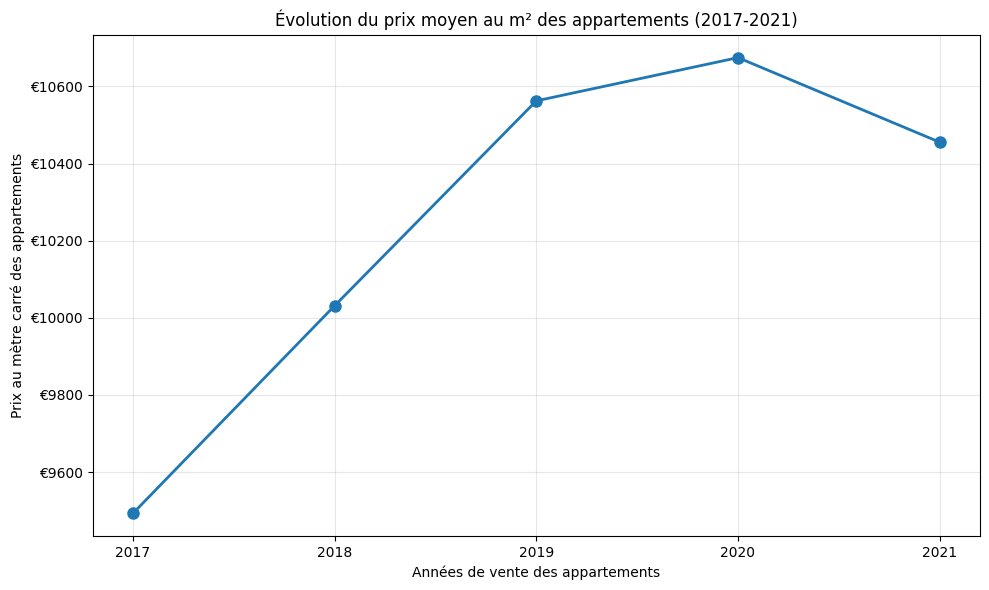

In [10]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Filtrer les données entre 2017 et 2021
df_periode = df_annuel[(df_annuel.index >= 2017) & (df_annuel.index <= 2021)]

plt.figure(figsize=(10, 6))
plt.plot(df_periode.index, df_periode['prix_m2_moyen'], marker='o', linewidth=2, markersize=8)
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au mètre carré des appartements')

# Formatage de l'axe Y en euros
formatter = ticker.FormatStrFormatter('€%.0f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True, alpha=0.3)
plt.title('Évolution du prix moyen au m² des appartements (2017-2021)')

# Améliorer l'affichage
plt.xticks(df_periode.index)  # Afficher toutes les années
plt.tight_layout()

#Export en image
plt.savefig("evolution_prix_appartements.png", dpi=300, bbox_inches='tight')

plt.show()

#Possibilité de rajouter infobulle pour intéractivité

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [11]:
#Liste des codes postaux dans nos données.
print(df_appartements['code_postal'].unique())

#utiliser numpy

[75003 75008 75001 75006 75005 75007 75010 75009 75011 75012 75013 75014
 75015 75016 75017 75018 75020 75019 75004 75002]


In [12]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_appartements['arrondissement'] = df_appartements['code_postal'].astype(str).str[-2:].astype(int)

df_arrond_annuel = df_appartements.groupby(['arrondissement', 'annee']).agg({
    'valeur_fonciere': 'mean',
    'surface_reelle': 'mean',
    'prix_m2': 'mean'
}).round(2).reset_index()

df_arrond_annuel.columns = ['arrondissement', 'annee', 'prix_moyen', 'surface_moyenne', 'prix_m2_moyen']

print("Évolution des prix par arrondissement :")
print(df_arrond_annuel.head(10))

Évolution des prix par arrondissement :
   arrondissement  annee  prix_moyen  surface_moyenne  prix_m2_moyen
0               1   2017   530392.41            45.24       11762.71
1               1   2018   581390.37            46.01       12621.23
2               1   2019   454606.24            34.31       13269.26
3               1   2020   601204.89            44.87       13405.99
4               1   2021   639321.08            47.78       13379.50
5               2   2017   470308.38            43.09       10920.13
6               2   2018   411782.83            36.40       11309.46
7               2   2019   482756.60            39.65       12150.54
8               2   2020   481732.58            39.50       12181.59
9               2   2021   457519.16            38.87       11773.45


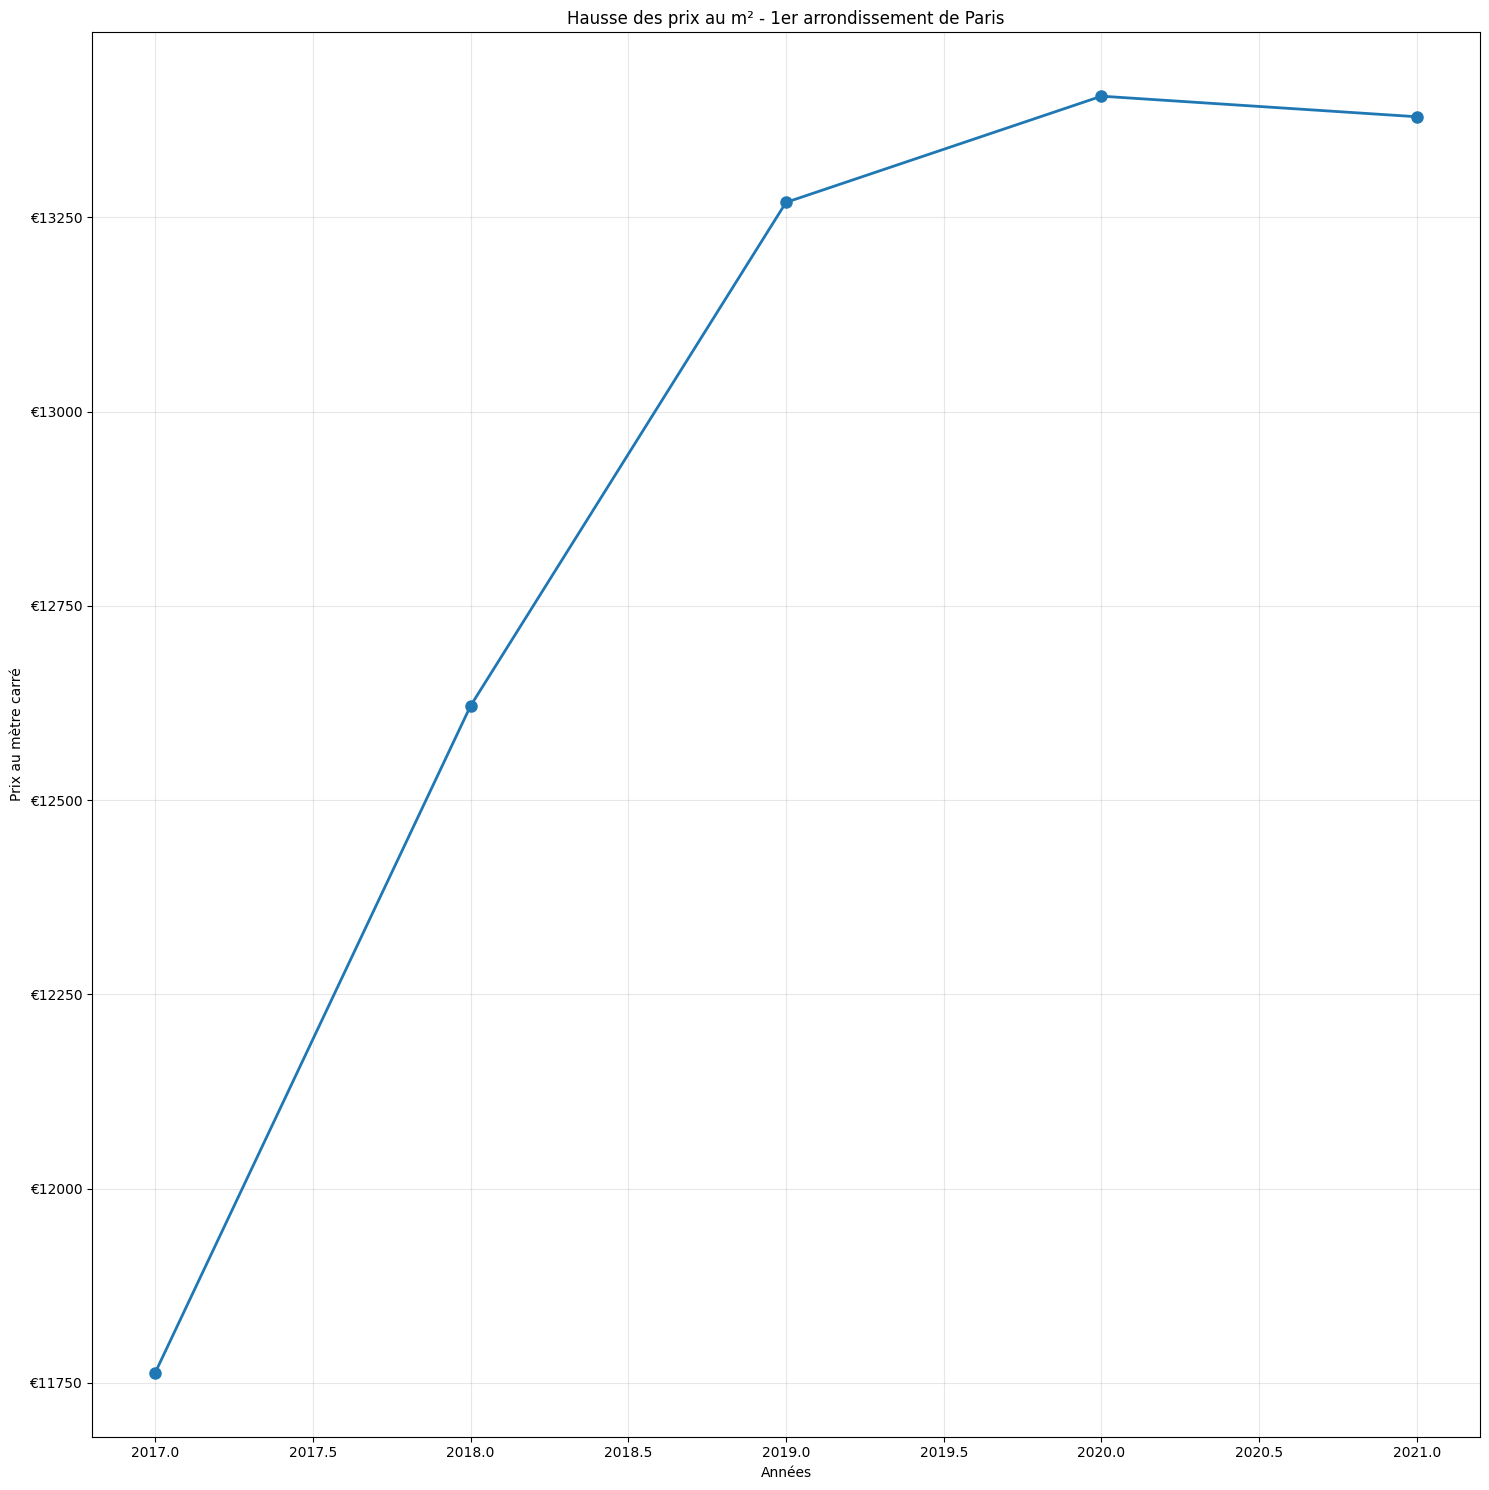

In [13]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
# Filtrer le 1er arrondissement
df_1er = df_arrond_annuel[df_arrond_annuel['arrondissement'] == 1].sort_values('annee')

plt.figure(figsize=(15, 15))
plt.plot(df_1er['annee'], df_1er['prix_m2_moyen'], marker='o', linewidth=2, markersize=8)
plt.xlabel('Années')
plt.ylabel('Prix au mètre carré')
plt.title('Hausse des prix au m² - 1er arrondissement de Paris')

formatter = ticker.FormatStrFormatter('€%.0f')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

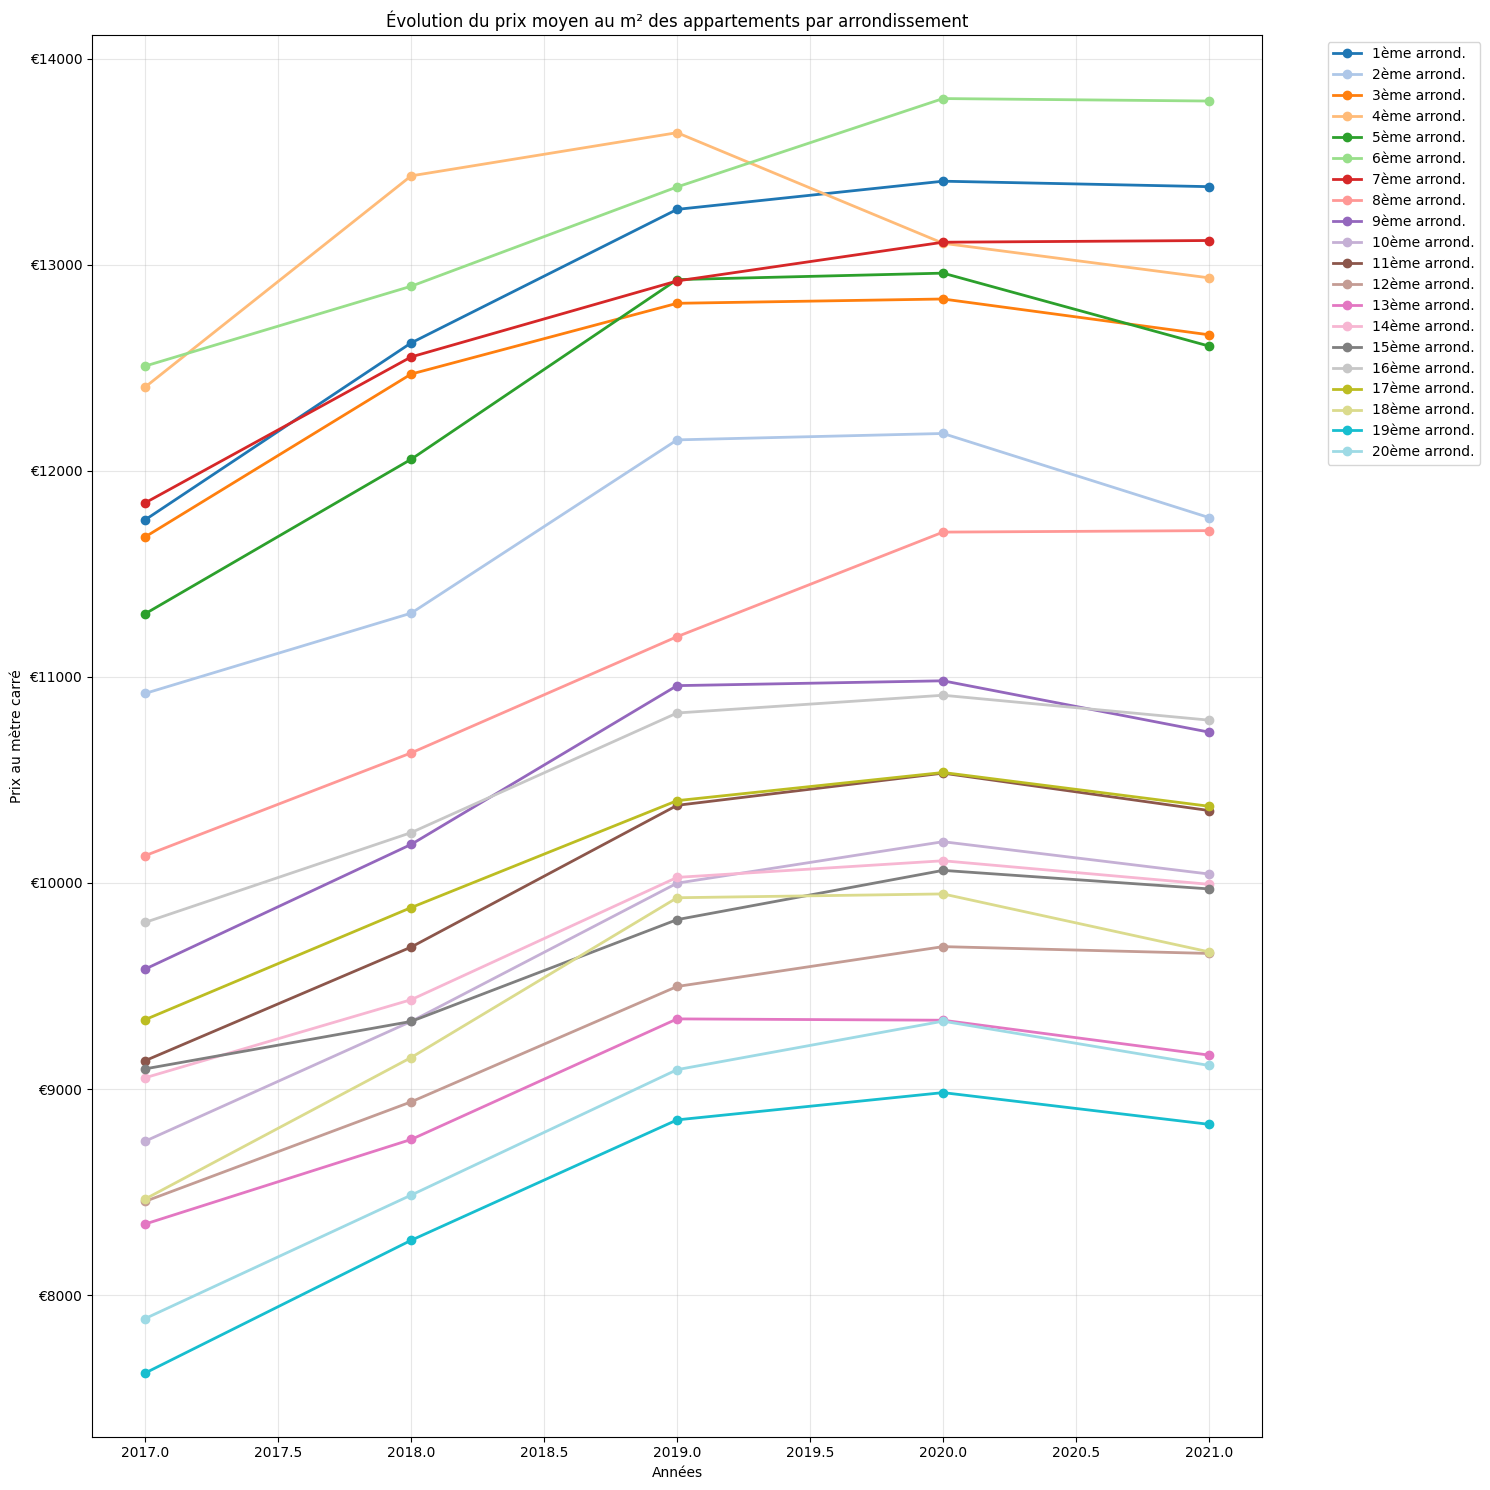

In [14]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris

# Obtenir la liste des arrondissements uniques
arrondissements = sorted(df_arrond_annuel['arrondissement'].unique())

plt.figure(figsize=(15, 15))

# Définir une palette de couleurs
colors = plt.cm.tab20(np.linspace(0, 1, len(arrondissements)))

# Tracer une courbe pour chaque arrondissement
for i, arrond in enumerate(arrondissements):
    df_arrond = df_arrond_annuel[df_arrond_annuel['arrondissement'] == arrond].sort_values('annee')
    plt.plot(df_arrond['annee'], df_arrond['prix_m2_moyen'], 
             marker='o', linewidth=2, markersize=6, 
             color=colors[i], label=f'{arrond}ème arrond.')

plt.xlabel('Années')
plt.ylabel('Prix au mètre carré')
plt.title('Évolution du prix moyen au m² des appartements par arrondissement')

# Formatage de l'axe Y en euros
formatter = ticker.FormatStrFormatter('€%.0f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

On observe que globalement que les prix des appartements ont augmenté dans tous les arrondissements.

### 7. Prix au metre carré par transaction dans un arrondissement

In [15]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
nb_total_6eme = len(df_appartements[df_appartements['arrondissement'] == 6])
print(f"Nombre total de transactions d'appartements dans le 6ème : {nb_total_6eme}")

Nombre total de transactions d'appartements dans le 6ème : 709


In [16]:
# Répartition par année
print("\nNombre de transactions par année dans le 6ème :")
transactions_6eme = df_appartements[df_appartements['arrondissement'] == 6]['annee'].value_counts().sort_index()
print(transactions_6eme)



Nombre de transactions par année dans le 6ème :
annee
2017    198
2018    175
2019    123
2020    108
2021    105
Name: count, dtype: int64


On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

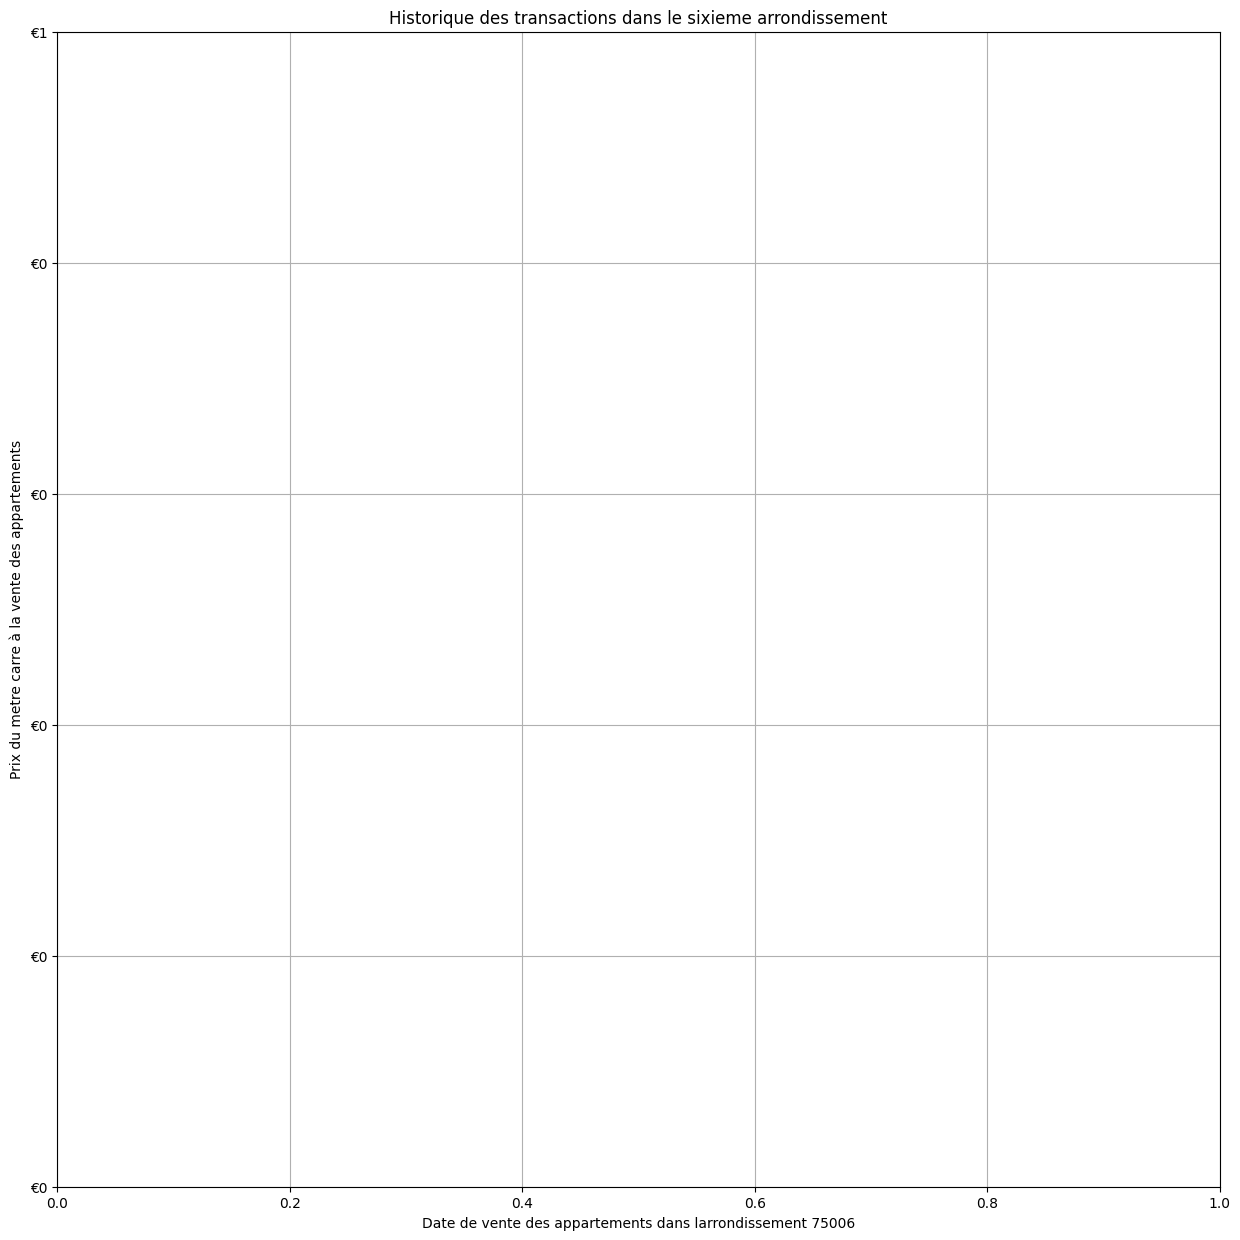

In [17]:
cp=75006
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(0,1)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

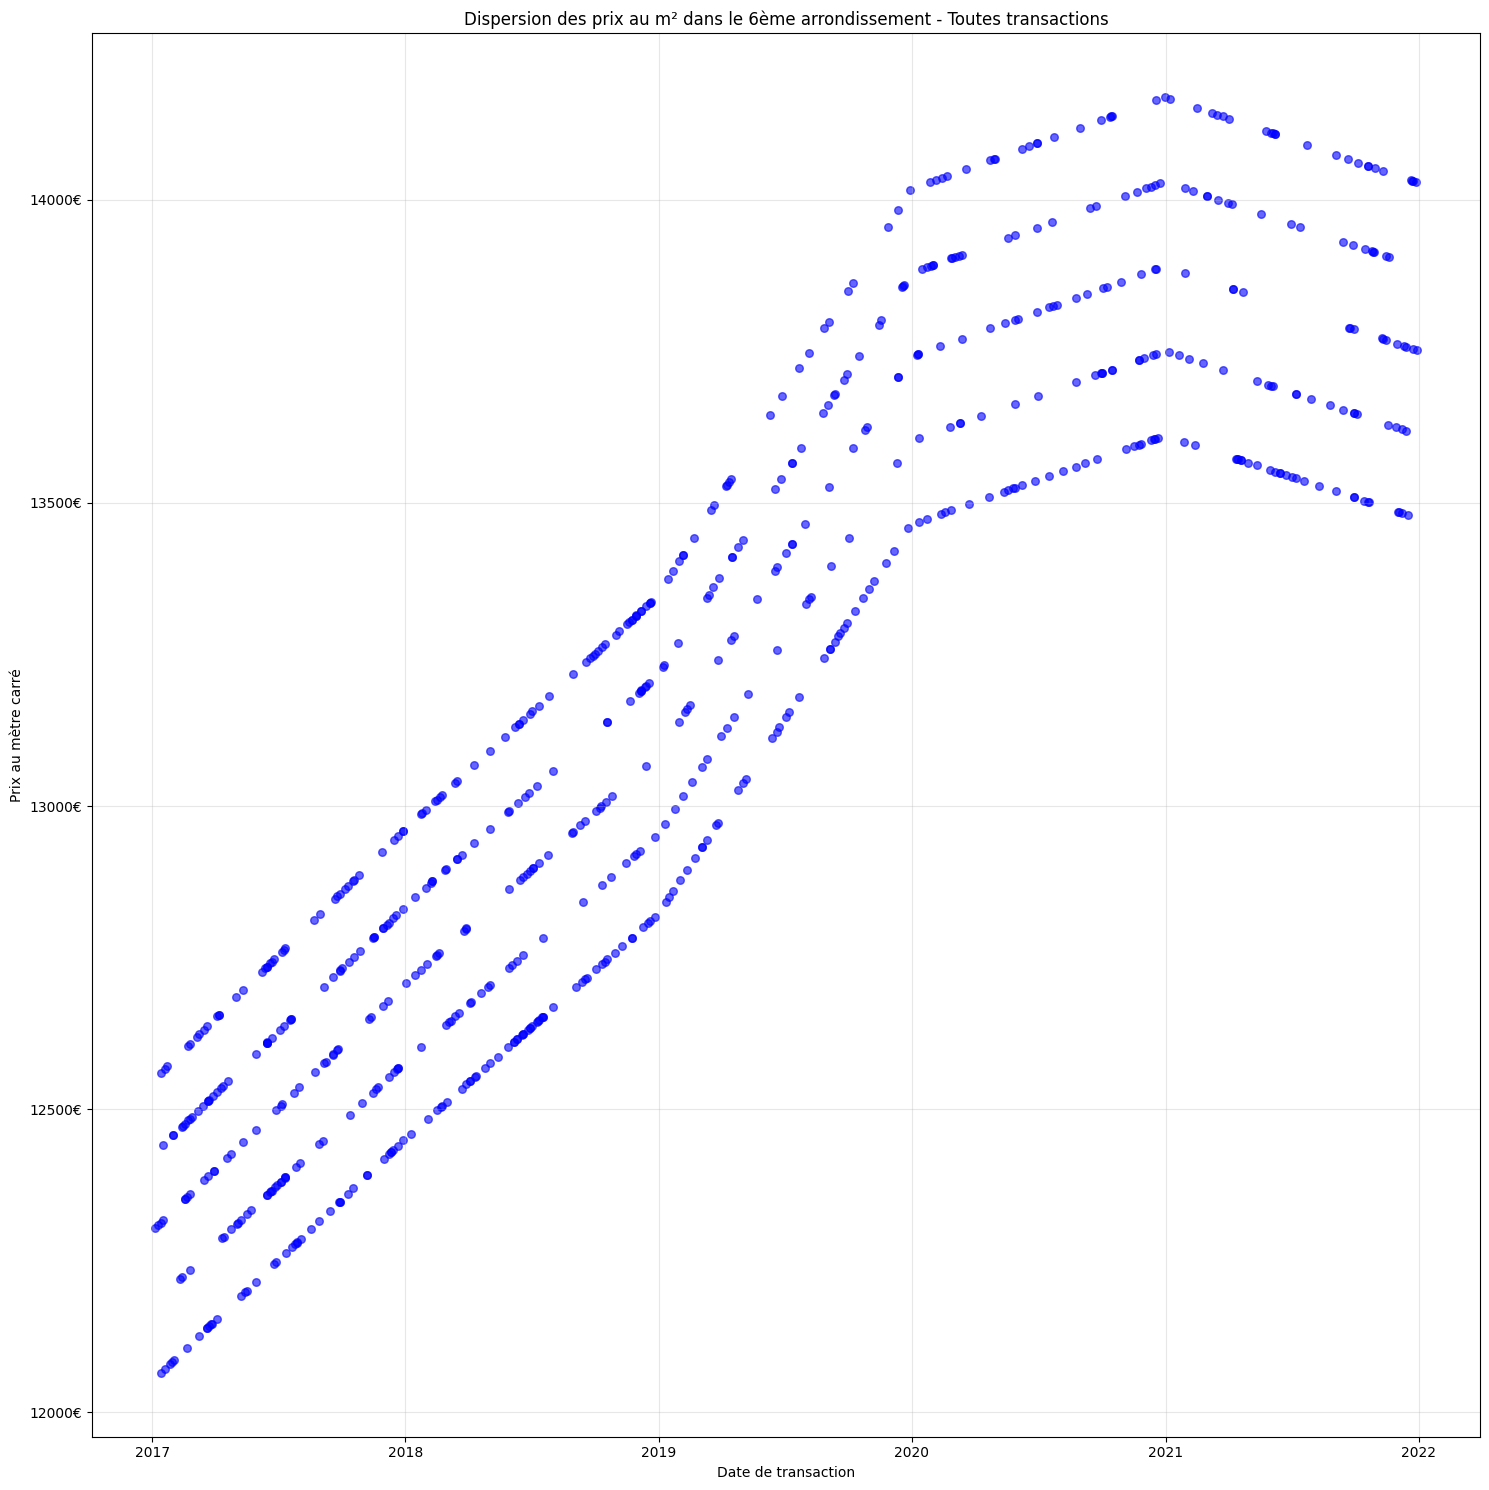

In [18]:
import matplotlib.dates as mdates

# Données du 6ème arrondissement
df_6eme = df_appartements[df_appartements['arrondissement'] == 6]

plt.figure(figsize=(15, 15))

# Nuage de points : date vs prix au m²
plt.scatter(df_6eme['date_mutation'], df_6eme['prix_m2'], 
           alpha=0.6, s=30, c='blue')

plt.xlabel('Date de transaction')
plt.ylabel('Prix au mètre carré')
plt.title('Dispersion des prix au m² dans le 6ème arrondissement - Toutes transactions')

# Formatage des axes
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}€'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

On observe que le prix semble augmenter dans le temps

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [19]:
#On calcule la corrélation de Spearman
from scipy import stats
import numpy as np
from scipy.stats import pearsonr
# Données du 6ème arrondissement
df_6eme = df_appartements[df_appartements['arrondissement'] == 6].copy()

# Convertir les dates en valeurs numériques (nombre de jours depuis une date de référence)
date_reference = df_6eme['date_mutation'].min()
df_6eme['jours_depuis_ref'] = (df_6eme['date_mutation'] - date_reference).dt.days

# Calculer le coefficient de corrélation de Pearson
correlation, p_value = pearsonr(df_6eme['jours_depuis_ref'], df_6eme['prix_m2'])

print("=== COEFFICIENT DE CORRÉLATION DE PEARSON ===")
print(f"Coefficient de corrélation (r) : {correlation:.4f}")
print(f"P-value : {p_value:.2e}")
print(f"R² (coefficient de détermination) : {correlation**2:.4f}")

=== COEFFICIENT DE CORRÉLATION DE PEARSON ===
Coefficient de corrélation (r) : 0.9038
P-value : 7.11e-263
R² (coefficient de détermination) : 0.8169


Le coefficient de corrélation est de 0.9038 avec une pvalue de 7.11e-263 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [20]:
# Données du 6ème arrondissement
df_6eme = df_appartements[df_appartements['arrondissement'] == 6].copy()

# Calculer le coefficient de corrélation de Pearson avec p-value
correlation, p_value = pearsonr(df_6eme['surface_reelle'], df_6eme['valeur_fonciere'])

print("=== CORRÉLATION VALEUR FONCIÈRE - SURFACE ===")
print(f"Coefficient de corrélation (r) : {correlation:.4f}")
print(f"P-value : {p_value:.2e}")
print(f"R² (coefficient de détermination) : {correlation**2:.4f}")

=== CORRÉLATION VALEUR FONCIÈRE - SURFACE ===
Coefficient de corrélation (r) : 0.9978
P-value : 0.00e+00
R² (coefficient de détermination) : 0.9955


Le coefficient de corrélation est de 0.997 avec une pvalue de 0 La relation est donc confirmée.


Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [21]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux_commerciaux = df[df['type_local'] == 'Local industriel. commercial ou assimilé']

In [22]:
df_locaux_commerciaux["annee"] = df_locaux_commerciaux["date_mutation"].dt.year

C:\Users\Sa_Osenat\AppData\Local\Temp\ipykernel_6956\210189142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_locaux_commerciaux["annee"] = df_locaux_commerciaux["date_mutation"].dt.year


In [23]:
df_locaux_commerciaux.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,annee
18,2017-02-01,3.113277e+06,65,RUE DE TURBIGO,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.109192,2017
29,2017-02-17,1.164375e+06,17,RUE DU PONT AUX CHOUX,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,12256.581685,2017
34,2017-02-20,3.802522e+05,10,RUE CAFFARELLI,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,12266.199603,2017
91,2017-03-09,3.623842e+05,33,RUE DE RICHELIEU,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.006027,2017
109,2017-03-29,3.159072e+05,130,RUE VIEILLE DU TEMPLE,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,12636.289027,2017


In [24]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_commerces_annuel = df_locaux_commerciaux.groupby('annee').agg({
    'valeur_fonciere': 'mean',
    'surface_reelle': 'mean',
    'prix_m2': 'mean'
}).round(2).reset_index()

df_commerces_annuel.columns = ['annee', 'prix_moyen', 'surface_moyenne', 'prix_m2_moyen']

print("=== ÉVOLUTION ANNUELLE DES LOCAUX COMMERCIAUX ===")
print(df_commerces_annuel)

=== ÉVOLUTION ANNUELLE DES LOCAUX COMMERCIAUX ===
   annee  prix_moyen  surface_moyenne  prix_m2_moyen
0   2017   965459.45            89.99       10949.91
1   2018  1003463.18            88.10       11569.50
2   2019   992822.16            82.83       11960.13
3   2020  1034380.46            85.63       11966.47
4   2021  1129357.18            92.83       12006.49


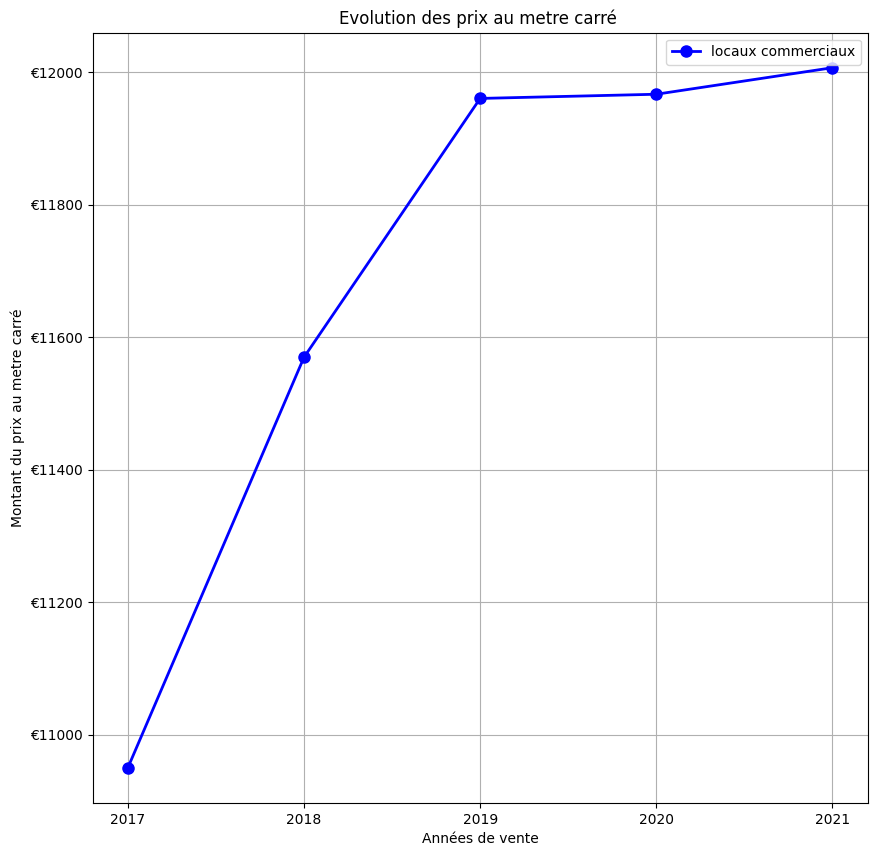

In [25]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.ticker as ticker

plt.figure(figsize=(10,10))

# Extraire les données des locaux commerciaux
annees_str = [str(int(annee)) for annee in df_commerces_annuel['annee']]
prix_commerces = df_commerces_annuel['prix_m2_moyen'].tolist()

plt.plot(annees_str, prix_commerces, label='locaux commerciaux', color='blue', marker='o', linewidth=2, markersize=8)

plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()

formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid()
plt.title('Evolution des prix au metre carré ')

plt.savefig("evolution_prix_locaux_commerciaux.png", dpi=300, bbox_inches='tight')

plt.show()

#Voir pour faire graphique à partir du dataframe initial (sans filtrage) pour comparer locaux commerciaux à appartements

Le prix au metre carré des locaux commerciaux est 12000€

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [26]:
#On verifie qu'il y ait pas de NaN
df.dtypes

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
prix_m2                    float64
dtype: object

In [27]:
# Import des packages nécessaires
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [28]:
# transformation de données dans le bon format
df['année'] = df['date_mutation'].dt.year
df['code_postal'] = df['code_postal'].astype(str)

print(df.dtypes)
# Sélection des colonnes utiles
colonnes_features = ['code_postal', 'type_local', 'surface_reelle', "année"]
df_ml = df[colonnes_features + ['valeur_fonciere']].copy()

# Transformation avec get_dummies()


# Appliquer get_dummies sur les colonnes catégoriques
df_encoded = pd.get_dummies(df_ml, 
                           columns=['code_postal', 'type_local'], 
                           prefix=['CP', 'TYPE'],
                           drop_first=True)  

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                 object
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
prix_m2                    float64
année                        int32
dtype: object


In [29]:
#dataset_encode['timestamp']=dataset_encode['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [30]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test
X = df_encoded.drop('valeur_fonciere', axis=1)  # Toutes les colonnes sauf la cible
y = df_encoded['valeur_fonciere']  # Variable à prédire
# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33,  # 33% pour le test
    random_state=42  # Pour la reproductibilité
)


In [31]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Nombre de coefficients : {len(model.coef_)}")
print(f"Intercept : {model.intercept_:,.2f}€")

Nombre de coefficients : 22
Intercept : -29,619,260.79€


In [32]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Erreur en pourcentage
erreur_pct = np.mean(np.abs((y_test - y_pred) / y_test) * 100)

print(f" MÉTRIQUES DE PERFORMANCE :")
print(f"- R² (qualité du modèle) : {r2:.3f}")
print(f"- Erreur absolue moyenne : {mae:,.0f}€")
print(f"- RMSE : {rmse:,.0f}€")
print(f"- Erreur moyenne en % : {erreur_pct:.2f}%")

 MÉTRIQUES DE PERFORMANCE :
- R² (qualité du modèle) : 0.986
- Erreur absolue moyenne : 34,424€
- RMSE : 78,279€
- Erreur moyenne en % : 9.49%


Notre algorithme fait donc 9.49 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Avec 0,98 le modèle explique bien la variance et les variables explicatives sont cohérentes
- Grande précision du modèle avec moins de 10% d'erreur en moyenne
- La performance peut sembler trop bonne

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [33]:
#On importe les données dans un dataframe
df_2022 = pd.read_excel("C:/Users/Sa_Osenat/OneDrive - gbh.fr/Bureau/Formation OC/portefeuille_actifs+(3).xlsx")

#On fixe l'année à 2022
df_2022['année'] = '2022'

print(df_2022.head())

#créer colonne annee = 2022 sinon utiliser truc timestamps

   adresse_numero            adresse_nom_voie  code_postal  code_commune  \
0             127             RUE SAINT-DENIS        75001         75101   
1              62  RUE NOTRE-DAME DE NAZARETH        75003         75103   
2              62              RUE DE TURENNE        75003         75103   
3              32                 AV GEORGE V        75008         75108   
4             152                BD HAUSSMANN        75008         75108   

                nom_commune  surface_carrez  code_type_local   type_local  \
0  Paris 1er Arrondissement           16.41                2  Appartement   
1   Paris 3e Arrondissement           20.47                2  Appartement   
2   Paris 3e Arrondissement           64.48                2  Appartement   
3   Paris 8e Arrondissement           63.29                2  Appartement   
4   Paris 8e Arrondissement           20.58                2  Appartement   

   surface_reelle_bati  nombre_pieces_principales  longitude   latitude année  


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [34]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

df_2022= df_2022.rename(columns= {'surface_reelle_bati':'surface_reelle'})

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df_2022['année'] = df_2022['année'].astype('int32')

print(df_2022.dtypes)

adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle                 int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
année                          int32
dtype: object


In [35]:
df_2022.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle,nombre_pieces_principales,longitude,latitude,année
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,2022
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,2022
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,2022
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,2022
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,2022


In [36]:
colonnes_features = ['code_postal', 'type_local', 'surface_reelle', "année"]
df_ml_2022 = df_2022[colonnes_features].copy()

# Transformation avec get_dummies()


# Appliquer get_dummies sur les colonnes catégoriques
df_encoded_2022 = pd.get_dummies(df_ml_2022, 
                           columns=['code_postal', 'type_local'], 
                           prefix=['CP', 'TYPE'],
                           drop_first=True)

In [37]:
#Conversion du dataframe en str


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [38]:
#On effectue la prédiction
X_2022 = df_encoded_2022
y_pred=model.predict(X_2022)
#On vérifie les 10 premières valeurs

print(y_pred[:10])

[424705.4768635  362460.90572081 820619.14229955 872575.77089695
 318523.94991801 457036.90516274 383770.59114308 636092.51711023
 133279.30884188 135692.66461253]


In [39]:
df_ml_2022['valeur foncière prédite'] = y_pred
print(df_ml_2022.head())

   code_postal   type_local  surface_reelle  année  valeur foncière prédite
0        75001  Appartement              25   2022            424705.476863
1        75003  Appartement              22   2022            362460.905721
2        75003  Appartement              65   2022            820619.142300
3        75008  Appartement              74   2022            872575.770897
4        75008  Appartement              22   2022            318523.949918


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [40]:
print(df_ml_2022.groupby('type_local')['valeur foncière prédite'].mean())
print(df_ml_2022.groupby('type_local')['valeur foncière prédite'].sum())

type_local
Appartement                                 455028.713007
Local industriel. commercial ou assimilé    803684.590559
Name: valeur foncière prédite, dtype: float64
type_local
Appartement                                 7.007442e+07
Local industriel. commercial ou assimilé    9.724584e+07
Name: valeur foncière prédite, dtype: float64


In [41]:
#Valorisation du portefeuille sur le segment des particuliers


print('la valorisation du segment particulier est de 70 millions deuros')


la valorisation du segment particulier est de 70 millions deuros


In [42]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est de 97 millions deuros')


la valorisation du segment corporate est de 97 millions deuros


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- A Paris les locaux corporate sont plus chers que les locaux particuliers cela peut être du à la surface locaux plus élevés pour les industriels
- Peut etre quele souci vient du jeu d'entrainement : manque de variables explicatives, ou variables explicatives présentes corrélés au type de local

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [43]:
#On importe les données dans un dataframe
df_classification = pd.read_excel("C:/Users/Sa_Osenat/OneDrive - gbh.fr/Bureau/Formation OC/Projet 8/echantillon_a_classer2.xlsx")

df_classification.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [44]:
df_classification['prix_m2'] = df_classification['valeur_fonciere']/df_classification['surface_reelle']

print(df_classification.head())

   valeur_fonciere  code_postal               nom_commune  surface_reelle  \
0    868687.083271        75019  Paris 19e Arrondissement              88   
1    452050.762192        75019  Paris 19e Arrondissement              45   
2    193088.653587        75019  Paris 19e Arrondissement              21   
3    303012.549370        75019  Paris 19e Arrondissement              32   
4    149272.200110        75019  Paris 19e Arrondissement              20   

        prix_m2  
0   9871.444128  
1  10045.572493  
2   9194.697790  
3   9469.142168  
4   7463.610005  


In [45]:
#On supprime les colonnes non utiles dans notre analyse
df_classification = df_classification.drop(['valeur_fonciere','surface_reelle'],axis=1)

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [46]:
from sklearn.cluster import KMeans

# PRÉPARATION DES DONNÉES
# Utiliser uniquement le prix au m² pour le clustering
X = df_classification[['prix_m2']].values
print(f"Prix au m² - Min: {df_classification['prix_m2'].min():.0f}€, Max: {df_classification['prix_m2'].max():.0f}€")

# APPLICATION DE K-MEANS (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Récupérer les centroïdes
centroides = kmeans.cluster_centers_
print(f"\n CENTROÏDES TROUVÉS :")
print(f"Centroïde 1 : {centroides[0][0]:.0f}€/m²")
print(f"Centroïde 2 : {centroides[1][0]:.0f}€/m²")

# AJOUTER LES RÉSULTATS AU DATAFRAME
df_classification['cluster'] = clusters
print(f"\nRépartition des clusters :")
print(df_classification['cluster'].value_counts().sort_index())

Prix au m² - Min: 7207€, Max: 10113€

 CENTROÏDES TROUVÉS :
Centroïde 1 : 7409€/m²
Centroïde 2 : 9807€/m²

Répartition des clusters :
cluster
0    20
1    20
Name: count, dtype: int64


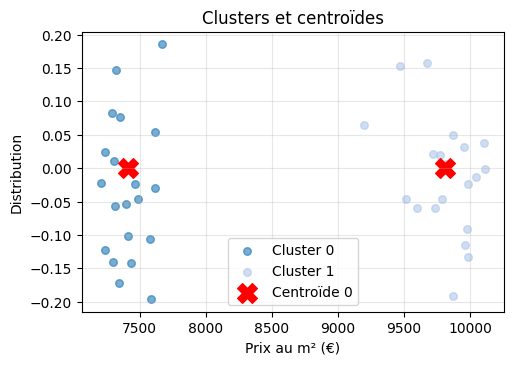

In [47]:
# On vérifie les données de la prédiction
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 2)
np.random.seed(42)
y_jitter = np.random.normal(0, 0.1, len(df_classification))  # Bruit pour séparer visuellement
for i in [0, 1]:
    mask = df_classification['cluster'] == i
    plt.scatter(df_classification[mask]['prix_m2'], y_jitter[mask], 
               color=colors[i], alpha=0.6, label=f'Cluster {i}', s=30)

# Marquer les centroïdes
for i, centroid in enumerate(centroides):
    plt.scatter(centroid[0], 0, color='red', marker='X', s=200, 
               label=f'Centroïde {i}' if i == 0 else "")

plt.xlabel('Prix au m² (€)')
plt.ylabel('Distribution')
plt.title('Clusters et centroïdes')
plt.legend()
plt.grid(True, alpha=0.3)

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [48]:
#On affiche les résultats
df_classification['type_predit'] = df_classification['cluster'].map({
    0: 'Appartement',
    1: 'Local industriel. commercial ou assimilé'
})

print(f"\nRépartition des clusters :")
print(df_classification['cluster'].value_counts().sort_index())
print(f"\nRépartition par type prédit :")
print(df_classification['type_predit'].value_counts())



Répartition des clusters :
cluster
0    20
1    20
Name: count, dtype: int64

Répartition par type prédit :
type_predit
Local industriel. commercial ou assimilé    20
Appartement                                 20
Name: count, dtype: int64


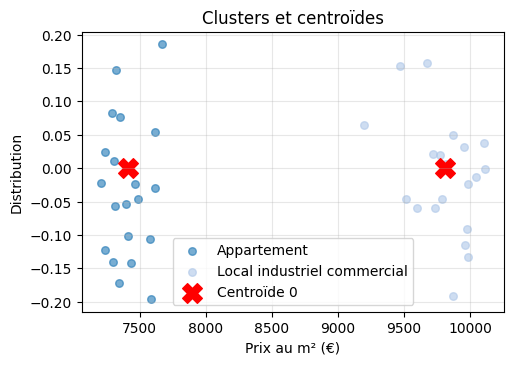

In [49]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
labels = ['Appartement', 'Local industriel commercial']

np.random.seed(42) # Pour la reproductibilité
y_jitter = np.random.normal(0, 0.1, len(df_classification)) 
for i in [0, 1]:
    mask = df_classification['cluster'] == i
    plt.scatter(df_classification[mask]['prix_m2'], y_jitter[mask], 
               color=colors[i], alpha=0.6, label=labels[i], s=30)

# Marquer les centroïdes
for i, centroid in enumerate(centroides):
    plt.scatter(centroid[0], 0, color='red', marker='X', s=200, 
               label=f'Centroïde {i}' if i == 0 else "")

plt.xlabel('Prix au m² (€)')
plt.ylabel('Distribution')
plt.title('Clusters et centroïdes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig("classification.png", dpi=300, bbox_inches='tight')

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- On trouve deux clusters. 20 appartements et 20 locaux commerciaux.
On considère que le cluster des locaux commerciaux est celui des biens avec le prix le plus élevé.
- Il n’y a que deux groupes -> non prise en compte des différents segments possibles.
Des appartements peuvent être considérés par l’algorithme comme des locaux commerciaux en raison de leur prix élevé.
Une seule variable est utilisée ce qui limite la fiabilité. La situation géographique des biens n’est pas prise en compte.